In [18]:
from ripser import ripser
from persim import plot_diagrams
from numpy import sin,cos, dot
import numpy as np
from numpy import pi,cos,sin
import matplotlib.pyplot as plt
import random


In [8]:
def graph_continuous(image_function, x, y, x_random = True, n_samples= 100000, y_random = True):
    
    if x_random == True:
        X = list(2 * x * np.random.random(n_samples) - x) 
        if y_random == True:
            Y = list(2 * y * np.random.random(n_samples) - y) 
        else:
            Y = np.linspace(-y,y,n_samples)      

    if x_random == False:
        X = np.linspace(-x,x,n_samples)
        if y_random == True:
            Y = list(2 * y * np.random.random(n_samples) - y) 
        else:
            Y = np.linspace(-y,y,n_samples)   

    x_points = []
    y_points = []
    colors = []
    for i in range(n_samples):
        color = image_function(X[i],Y[i]) 
        colors.append(color)
        x_points.append(X[i])
        y_points.append(Y[i])

        
    fig = plt.figure(figsize = (7, 7))
    ax = plt.axes()
    ax.scatter(x_points, y_points, c = colors, s = .1)
    plt.show()
    
    
def view_window_continuous(image_function, num_pixels, window_size):
    
    pixels = get_pixels(num_pixels, window_size)
            
    x_points = []
    y_points = []
    colors = []
    for i in range(len(pixels)):
        color = image_function(pixels[i][0],pixels[i][1]) 
        colors.append(color)
        x_points.append(pixels[i][0])
        y_points.append(pixels[i][1])
    
    fig = plt.figure(figsize = (7, 7))
    ax = plt.axes()
    ax.scatter(x_points, y_points, c = colors)
    plt.show()

In [9]:
def get_pixels(num_pixels, window_size):
    sample = list(np.linspace(-window_size/2, window_size/2, num_pixels))
    pixels = []
    for i in range(len(sample)):
        for j in range(len(sample)):
            pixels.append((sample[i],sample[j]))     
    return pixels


def get_colors(pixels, image_function):
    colors = []
    for pixel in pixels:
        colors.append(image_function(pixel[0],pixel[1]))
    return colors  

def translation(a,b):
    def t_ab(x,y): 
        return x+a, y+b
    return t_ab

def rotation(theta):
    def r_theta(x,y):
        return x * cos(theta) - y * sin(theta), x * sin(theta) + y * cos(theta)
    return r_theta

def isom(a,b,theta):
    def iso(x,y):
        r = rotation(theta)
        t = translation(a,b)
        return t(r(x,y)[0], r(x,y)[1])
    return iso

def generate_isom(n_isos, x_translate, y_translate):
    a = list(2 * x_translate * np.random.random(n_isos) - x_translate) # sampling from (-x,x)
    b = list(2 * y_translate * np.random.random(n_isos) - y_translate) # sampling from (-y,y)
    theta = list(2 * pi * np.random.random(n_isos)) # sampling from (0, 2pi)

    isos = []
    isos_inv = []
    for i in range(n_isos):
        isos.append(isom(a[i], b[i], theta[i]))
        isos_inv.append(isom(-1 * a[i],-1 * b[i],2 * pi - theta[i])) 
    return isos_inv

def new_colors(pixels, iso_inv, image_function):
    pixels_inv = []
    for pixel in pixels: 
        pixels_inv.append(iso_inv(pixel[0], pixel[1]))
    new_colors = get_colors(pixels_inv, image_function)
    return new_colors

def matrix_of_images(pixels, isos_inv, image_function):
    vectors = []
    for i in isos_inv:
        vectors.append([new_colors(pixels, i, image_function)])
    M = np.concatenate(vectors, axis=0 )
    return M

def p_hom(M, maxdim, coeff):
    output = ripser(M, maxdim = maxdim, coeff = coeff)
    return output
    
def persistent_H1_intervals(output):
    H1 = output['dgms'][1].tolist() # all intervals in H1
    d = []
    for pair in H1: 
        d.append(pair[1] - pair[0]) # finding lengths of intervals in H1
    d.sort(reverse = True) # sorting from longest to shortest intervals
    d
    return d

def plot_dgms(output):
    dgms = output['dgms']
    fig = plt.figure(figsize = (12, 6))
    plot_diagrams(dgms)
    
def pipeline(image_function, num_pixels, window_size, n_isos, x_translate, y_translate, maxdim, coeff):
    pixels = get_pixels(num_pixels, window_size)
    isos_inv = generate_isom(n_isos, x_translate, y_translate)
    M = matrix_of_images(pixels, isos_inv, image_function)
    output = p_hom(M, maxdim, coeff)
    return output

In [34]:
def p1(x,y): #wrong
    d1 = (1,0)
    d2 = (0,1)
    X = 1/(2*pi) * np.dot((x,y), d1)
    Y = 1/(2*pi) * np.dot((x,y), d2)
    return cos(2*X + Y) + sin(2*X + Y)

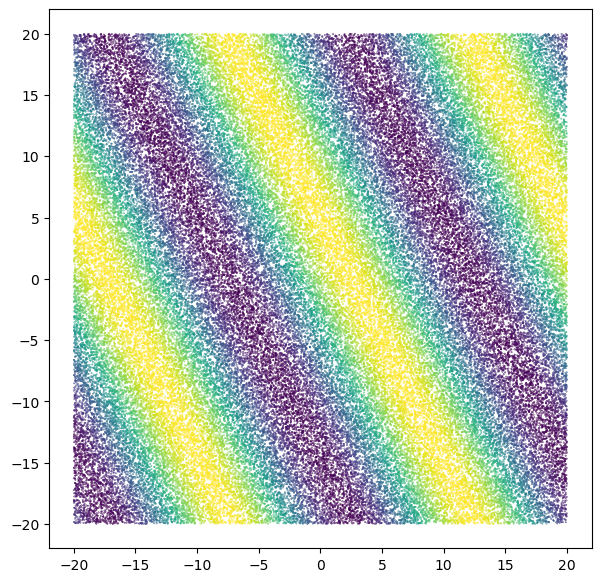

In [31]:
graph_continuous(p1, 20,20)

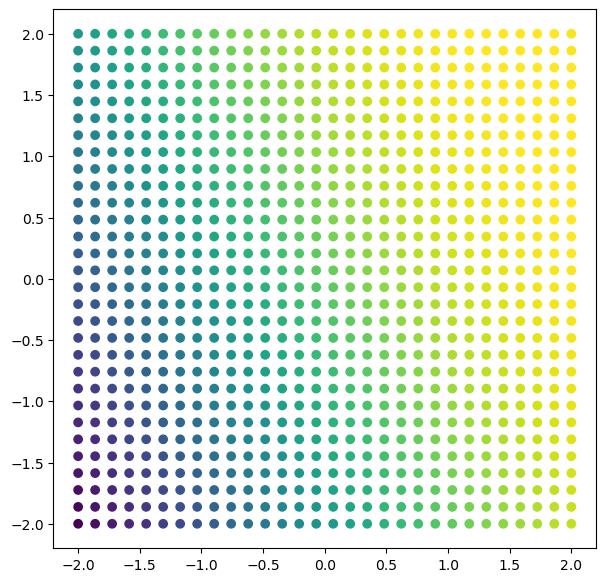

In [24]:
view_window_continuous(p1, 30, 4)

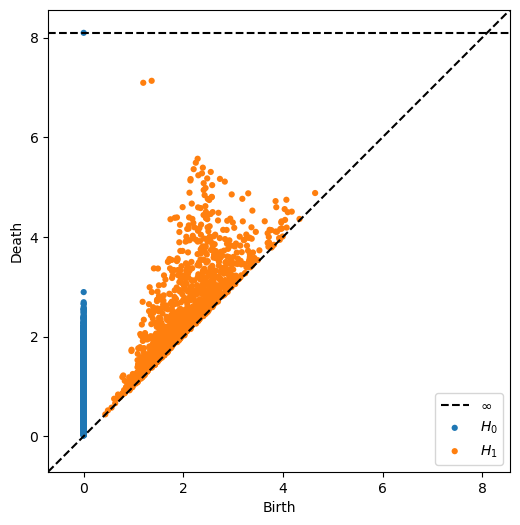

In [28]:
output = pipeline(image_function = p1, num_pixels = 30 , window_size = 5, n_isos = 4000, x_translate= 10 , y_translate=10, maxdim=1, coeff=2)
plot_dgms(output)

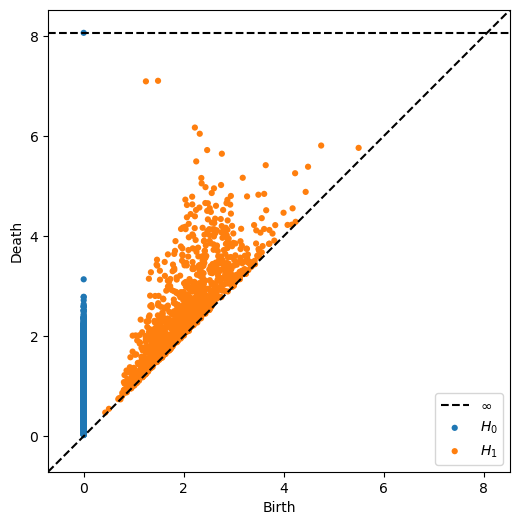

In [30]:
output = pipeline(image_function = p1, num_pixels = 30 , window_size = 5, n_isos = 4000, x_translate= 20 , y_translate=20, maxdim=1, coeff=2)
plot_dgms(output)

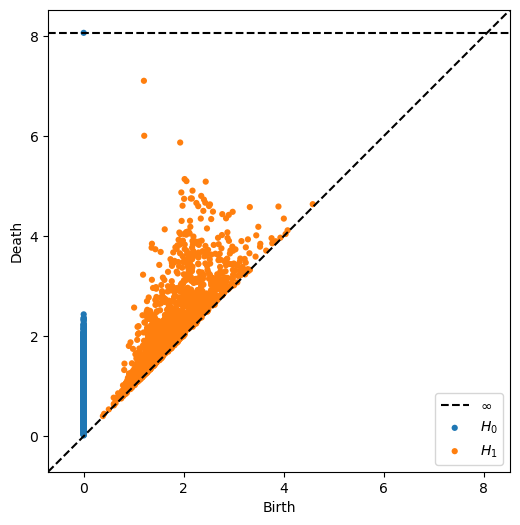

In [35]:
output = pipeline(image_function = p1, num_pixels = 30 , window_size = 5, n_isos = 5000, x_translate= 20 , y_translate=20, maxdim=1, coeff=3)
plot_dgms(output)

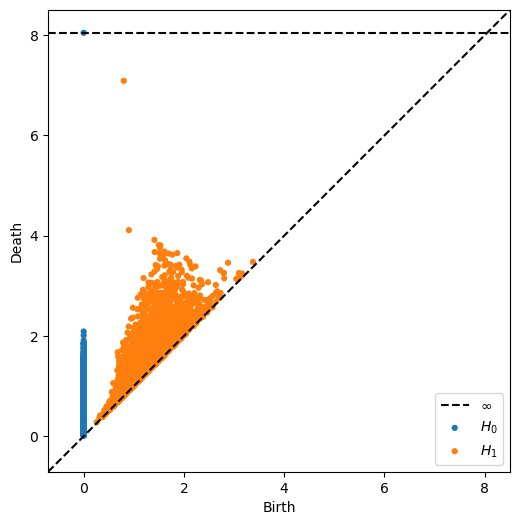

In [43]:
output = pipeline(image_function = p1, num_pixels = 30 , window_size = 5, n_isos = 10000, x_translate= 20 , y_translate=20, maxdim=1, coeff=3)
plot_dgms(output)

This is C4

In [87]:
def p1(x,y): # wrong
    d1 = (1,-2)
    d2 = (0,1)
    X = 1/(2*pi) * np.dot((x,y), d1)
    Y = 1/(2*pi) * np.dot((x,y), d2)
    return cos(X + Y) + sin(X + Y) + sin(4 * X + Y) 

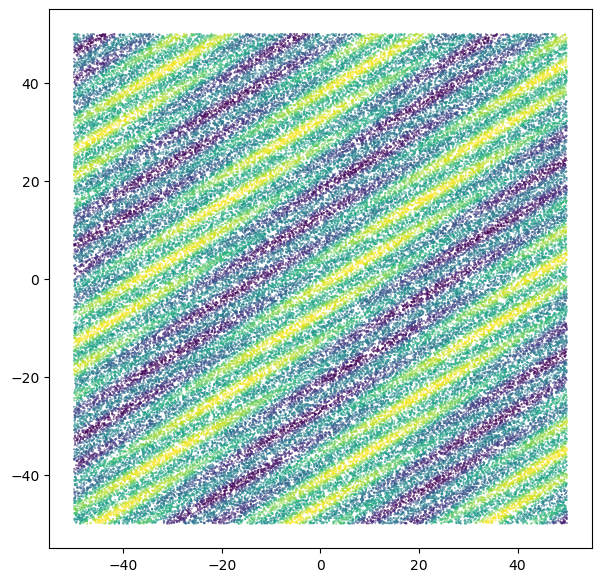

In [88]:
graph_continuous(p1, 50,50)

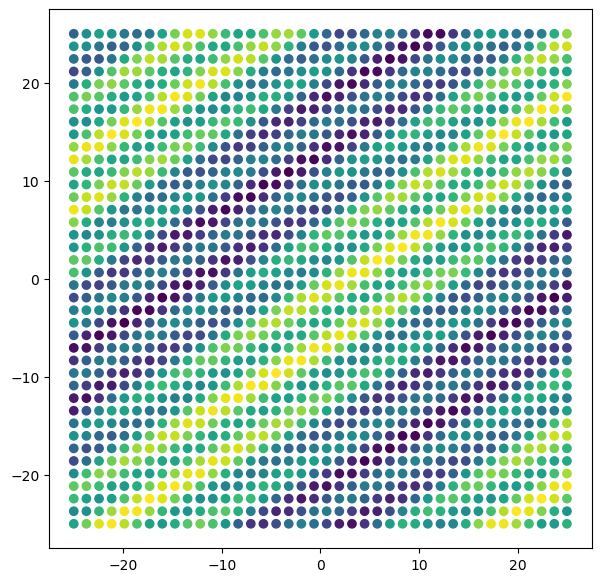

In [83]:
view_window_continuous(p1, 40, 50)

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


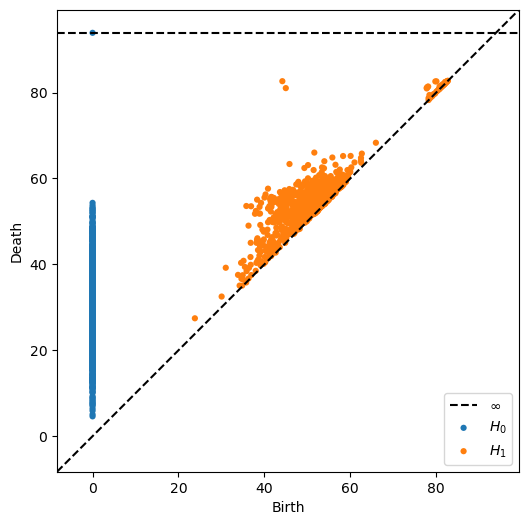

In [84]:
output = pipeline(image_function = p1, num_pixels = 50 , window_size = 50, n_isos = 1000, x_translate= 10 , y_translate=10, maxdim=1, coeff=2)
plot_dgms(output)

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


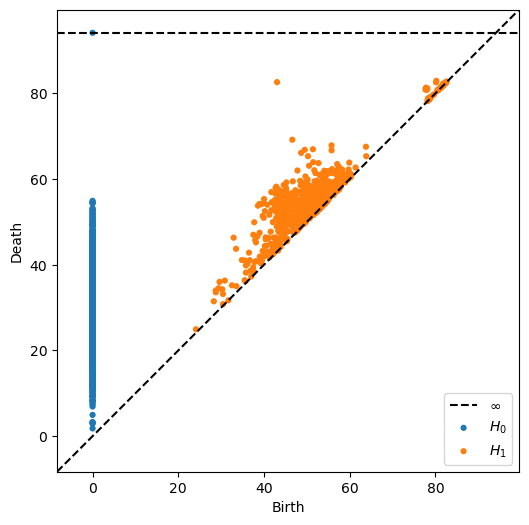

In [89]:
output = pipeline(image_function = p1, num_pixels = 50 , window_size = 50, n_isos = 1000, x_translate= 10 , y_translate=10, maxdim=1, coeff=3)
plot_dgms(output)

THIS IS C4 AGAIN

In [107]:
def p1(x,y): #wrong
    d1 = (1/2, 3/2)
    d2 = (0,2)
    X = 1/(2*pi) * np.dot((x,y), d1)
    Y = 1/(2*pi) * np.dot((x,y), d2)
    return sin(2*Y)

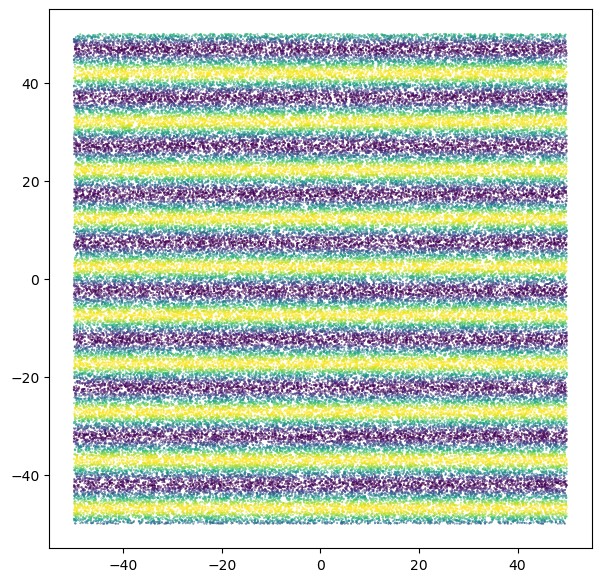

In [108]:
graph_continuous(p1, 50,50)

In [46]:
def p3(x,y):
    X = 1/(2 * pi) * (x + y / (3**.5))
    Y = 1/(2 * pi) * y / (3**.5)
    C = cos(X + Y) + cos(X - 2 * Y) + cos(-2 * X + Y)
    S = sin(X + Y) +sin(X - 2*Y) +sin(-2 * X + Y)
    return C + S

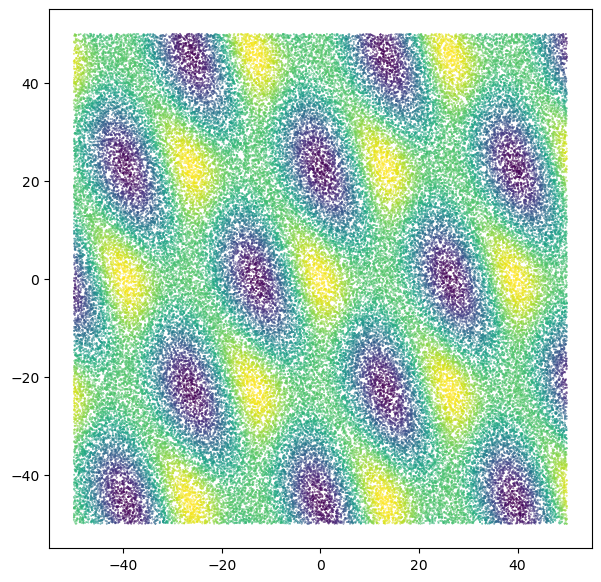

In [49]:
graph_continuous(p3, 50,50)

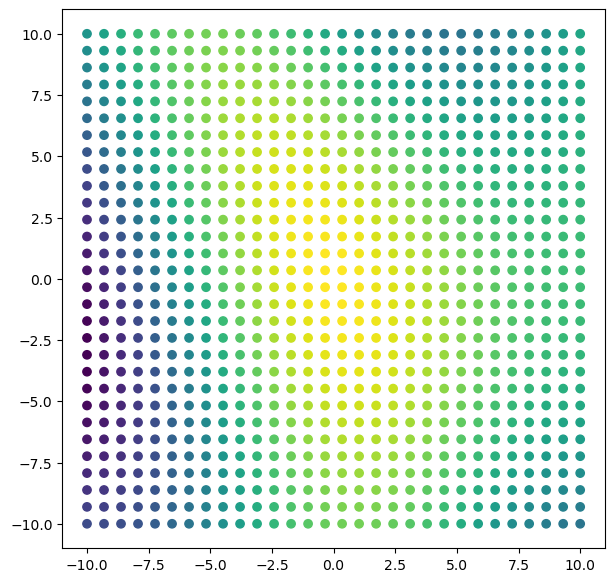

In [51]:
view_window_continuous(p3, 30, 20)

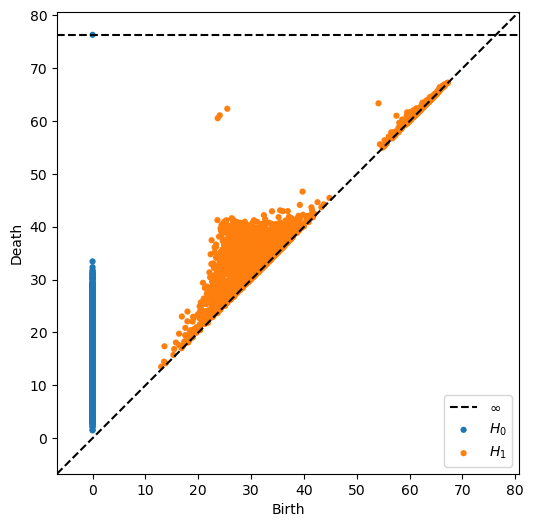

In [17]:
output = pipeline(image_function = p3, num_pixels = 30 , window_size = 1.5, n_isos = 4000, x_translate= 10 , y_translate=10, maxdim=1, coeff=2)
plot_dgms(output)

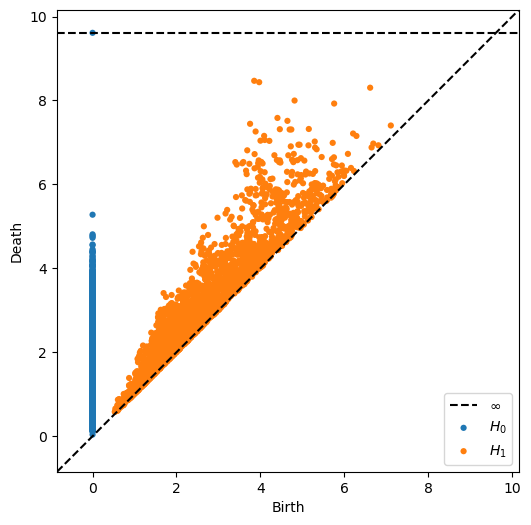

In [40]:
output = pipeline(image_function = p3, num_pixels = 30 , window_size = 2, n_isos = 7000, x_translate= 10 , y_translate=10, maxdim=1, coeff=3)
plot_dgms(output)

In [41]:
output = pipeline(image_function = p3, num_pixels = 30 , window_size = 2, n_isos = 8000, x_translate= 10 , y_translate=10, maxdim=1, coeff=3)
plot_dgms(output)

In [42]:
output = pipeline(image_function = p3, num_pixels = 30 , window_size = 2, n_isos = 10000, x_translate= 10 , y_translate=10, maxdim=1, coeff=3)
plot_dgms(output)

In [121]:
def p3_take2(x,y):
    X = 1/(2 * pi) * (x + y / (3**.5))
    Y = 1/(2 * pi) * y / (3**.5)
    n = 2
    m = 3
    C = cos(n * X + m * Y) + cos(m * X - (n + m) * Y) + cos(-(n+m) * X + n * Y)
    S = sin(n * X + m * Y) + sin(m * X - (n + m) * Y) +sin(-(n+m) * X + n * Y)
    return C + S

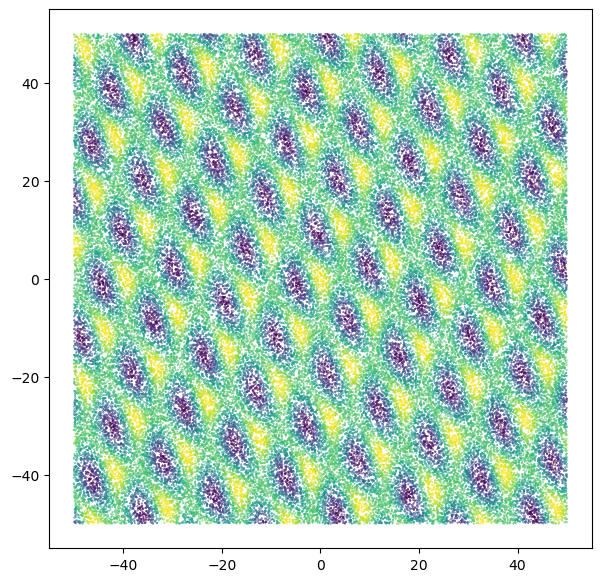

In [122]:
graph_continuous(p3_take2, 50,50)

# Kyle's example

In [125]:
def lw_by_hand(x,y):
    return cos(3*x + 2*y) + sin(2*x + y)

In [127]:
graph_continuous(lw_by_hand, 30,30)

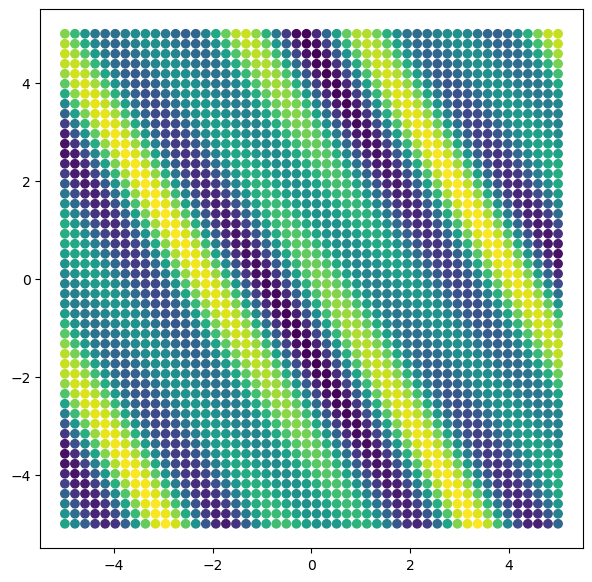

In [131]:
view_window_continuous(lw_by_hand, 50, 10)

In [135]:
def pipeline(image_function, num_pixels, window_size, n_isos, x_translate, y_translate, maxdim, coeff):
    pixels = get_pixels(num_pixels, window_size)
    isos_inv = generate_isom(n_isos, x_translate, y_translate)
    M = matrix_of_images(pixels, isos_inv, image_function)
    output = p_hom(M, maxdim, coeff)
    return output

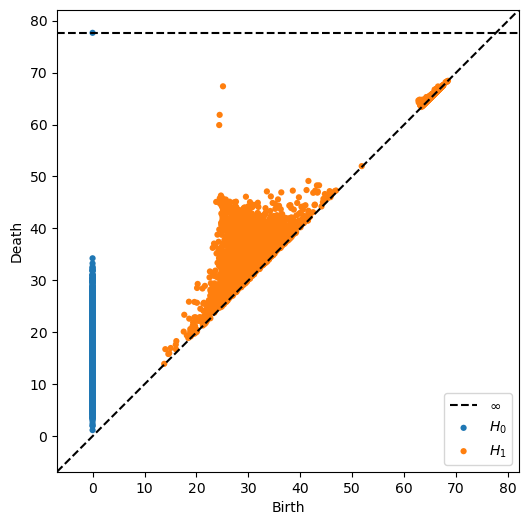

In [137]:
output = pipeline(image_function = lw_by_hand, num_pixels = 50 , window_size = 10, n_isos = 3000, x_translate= 10 , y_translate=10, maxdim=1, coeff=2)
plot_dgms(output)

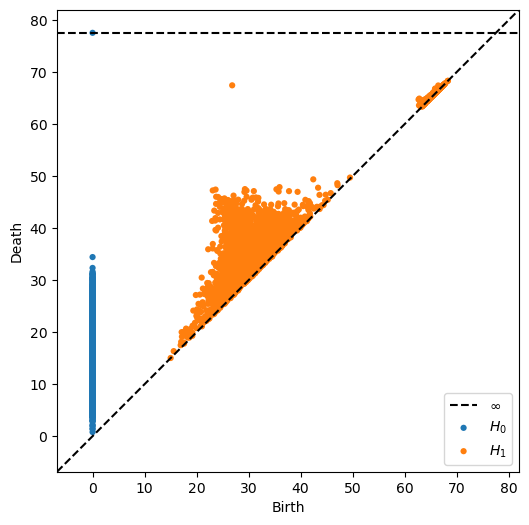

In [138]:
output = pipeline(image_function = lw_by_hand, num_pixels = 50 , window_size = 10, n_isos = 3000, x_translate= 10 , y_translate=10, maxdim=1, coeff=3)
plot_dgms(output)